## Bank Term Deposit Prediction

In [1]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
#Loading data
bank = pd.read_csv("bank.csv",sep=';')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
bank.shape

(4521, 17)

### Data Pre-processing

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
#Statistical Analysis
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
#Checking Missing values
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no missing values in this dataset

In [8]:
#Checking for duplicates
bank.duplicated().sum()

0

In [9]:
#Investigating these 12 duplicates
bank[bank.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


These relate to different campaigns hence not duplicates

### Exploratory Data Analysis

#### Age Distribution

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


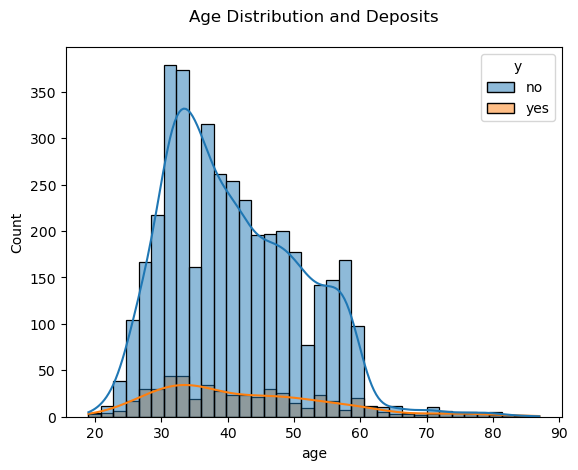

In [10]:
sns.histplot(x="age", data=bank, kde=True, hue= "y")
plt.title("Age Distribution and Deposits\n")
plt.show()

Maximum clients are between the age 30 - 40 and majority clients subscribing to Term Deposit also fall between these age groups.

#### Distribution of Occupation

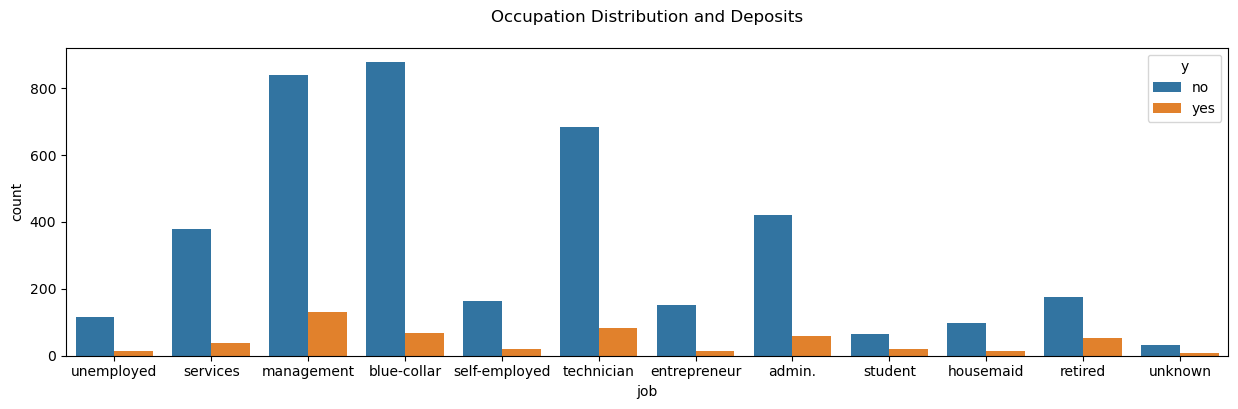

In [11]:
plt.figure(figsize=(15,4))
sns.countplot(x="job", data= bank, hue ="y")
plt.title("Occupation Distribution and Deposits\n")
plt.show()

Majority of clients have occupation "Admin", "blue-collar" or "Technician" and maximum clients subscribing to Term Deposit also are from these occupation.

#### Distribution of Marital Status

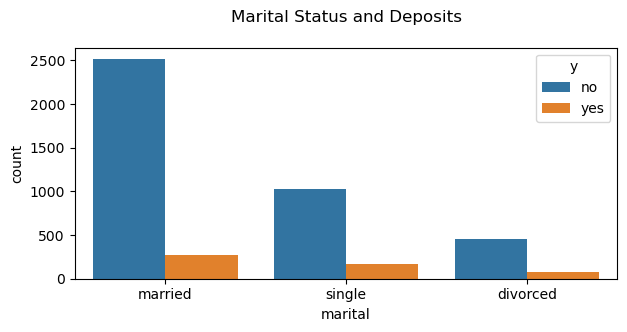

In [12]:
plt.figure(figsize=(7,3))
sns.countplot(x="marital", data= bank, hue ="y")
plt.title("Marital Status and Deposits\n")
plt.show()

Clients are mostly married

#### Distribution of Education Status

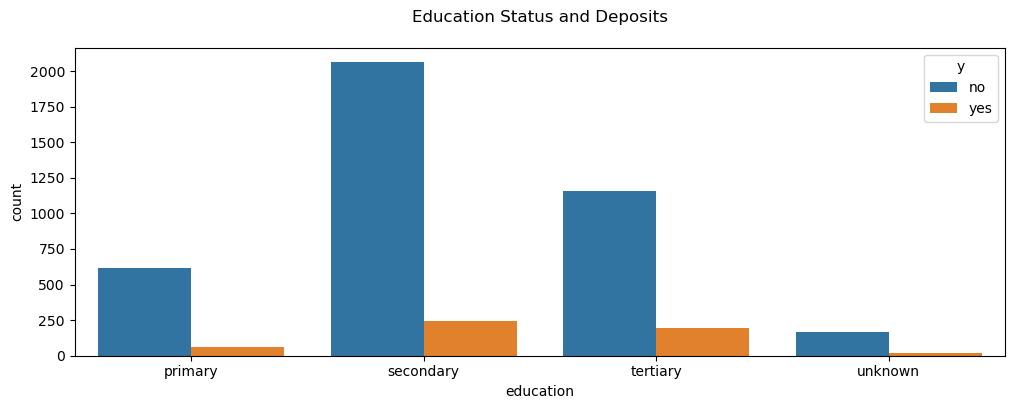

In [13]:
plt.figure(figsize=(12,4))
sns.countplot(x="education", data= bank, hue ="y")
plt.title("Education Status and Deposits\n")
plt.show()

Most of the clients have University degree and have studied high or professional course. 

#### Credit defaults - any ?

In [14]:
bank.default.value_counts()

default
no     4445
yes      76
Name: count, dtype: int64

Majority of clients do not have any Credit defaults. Only 3 clients have a Credit default

#### Distribution of Housing Loan

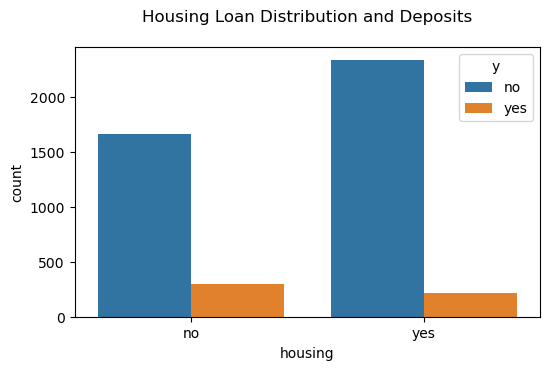

In [15]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="housing", data= bank, hue ="y")
plt.title("Housing Loan Distribution and Deposits\n")
plt.show()

Clients subscribing to Term Deposits mostly have Home loan

#### Distribution of Personal Loan

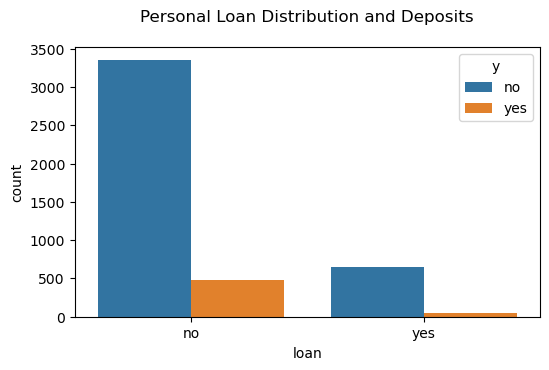

In [16]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="loan", data= bank, hue ="y")
plt.title("Personal Loan Distribution and Deposits\n")
plt.show()

Most of the Clients subscribing to Term Deposits dont have personal loan

#### Distribution of Outcome (Term Deposits)

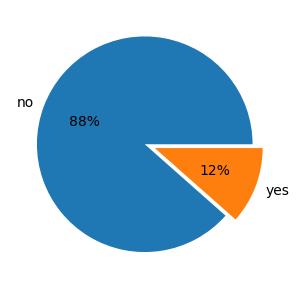

In [17]:
#Count of Outcome
bank.y.value_counts()
keys = bank.y.value_counts().index
data = bank.y.value_counts().values
plt.figure(figsize=(6,3.5))
explode = [0,0.1]
plt.pie(data,labels=keys,explode=explode, autopct='%.0f%%')
plt.show()

11% of clients have subscribed to Term Deposit

##### Let us now prepare our data for Model building

### Label Encoding Categorical Features

In [18]:
cols = bank.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [19]:
le = LabelEncoder()

bank[cols] = bank[cols].apply(le.fit_transform)

In [20]:
bank.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,11,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0


#### Correlation Analysis using Heatmap

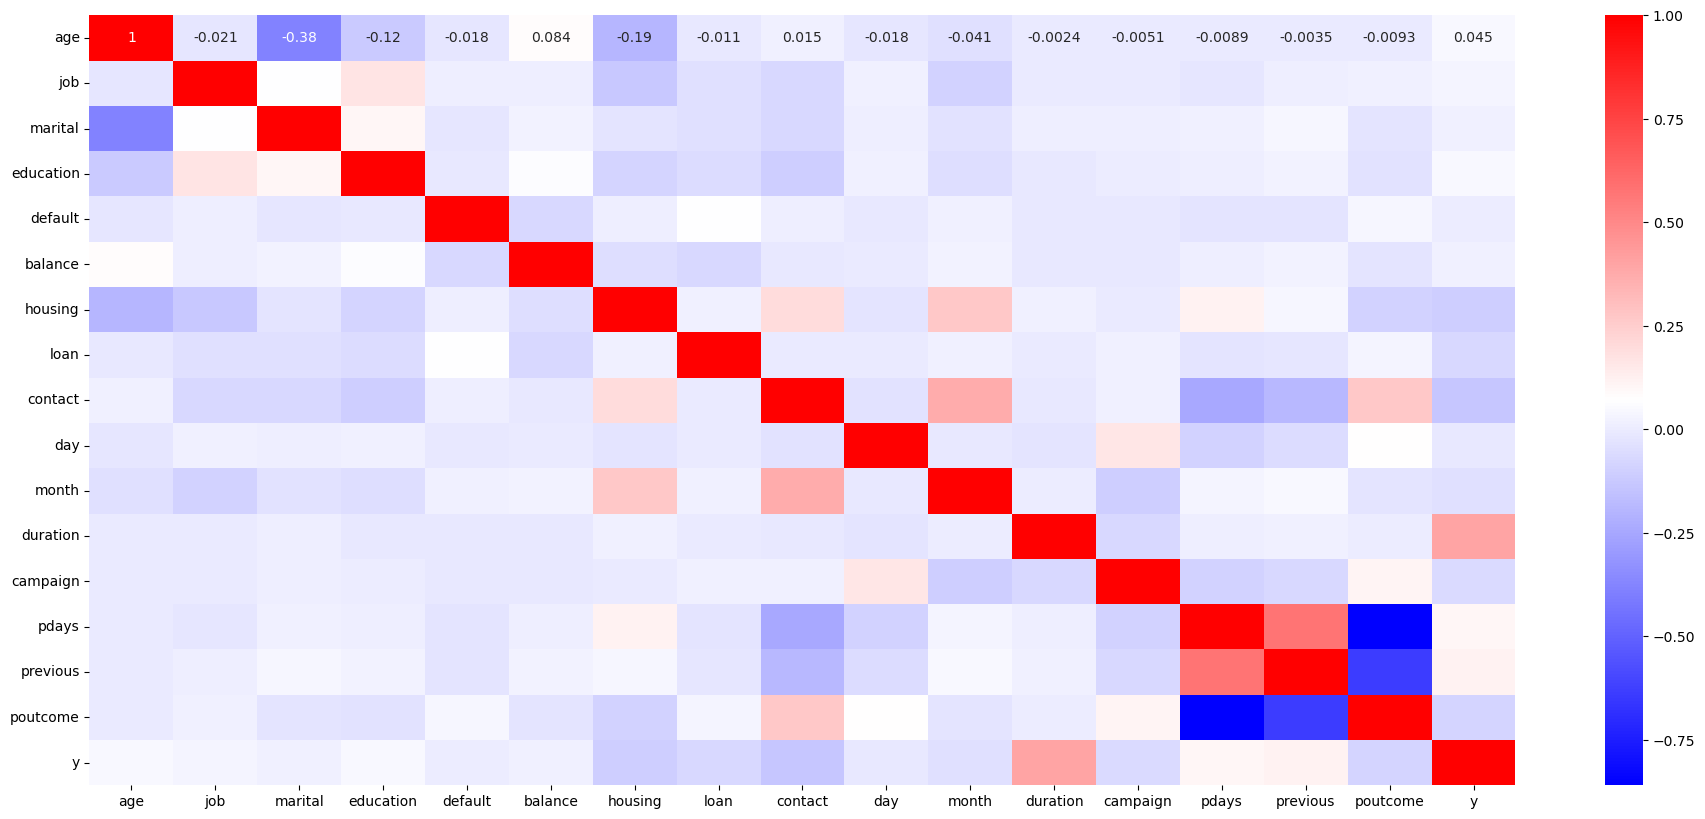

In [21]:
plt.figure(figsize=(23,10))
sns.heatmap(bank.corr(), cmap='bwr', annot=True)
plt.show()

- Outcome "y" is positively correlated with duration of call and also shows slight correlation with previous attempts of call.
This implies that clients went ahead with Term deposits subscription after gaining sufficient insights from bank calls and persuation.
- multicolinearty can be seen among some input features. This can be handled by dropping those variables or by performing LDA(Linear discriminant analysis) on the data.

### Standardisation

In [22]:
#Splitting input and output
X = bank.drop("y", axis=1)
y = bank.y

In [23]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

### Model building - Decision Tree Classifier

In [24]:
#Train-test split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

In [25]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [26]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))  
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))    

Train Score: 1.0
Test Score: 0.8629329403095063


In [27]:
cross_val_score(decision_tree, train_X, train_y, cv=5).mean()

0.8628387025816388

In [28]:
ypred = decision_tree.predict(test_X)
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1210
           1       0.36      0.35      0.36       147

    accuracy                           0.86      1357
   macro avg       0.64      0.64      0.64      1357
weighted avg       0.86      0.86      0.86      1357



#### Hyperparameter tunning

In [29]:
#Applying Grid search cv to find best estimaters to improve model performance

param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

In [30]:
gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [31]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 20}

In [32]:
gscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=20)

In [33]:
cross_val_score(gscv.best_estimator_, train_X, train_y, cv=5).mean() 

0.8922275881376608

we will use this best estimators to built our model.

In [34]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [35]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.9152970922882427
Test Score: 0.9012527634487841


In [36]:
pred_y = clf.predict(test_X)

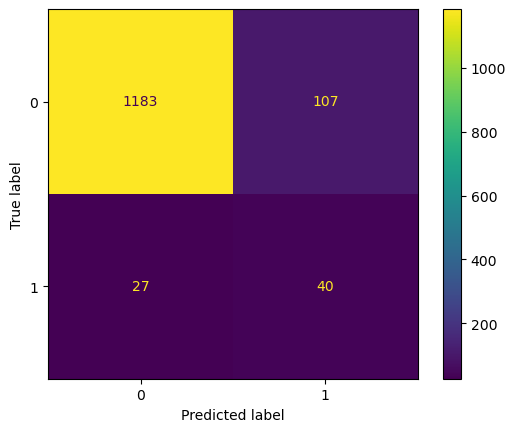

In [37]:
#Confusion Matrix
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()

In [38]:
#Classification Report
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95      1290
           1       0.27      0.60      0.37        67

    accuracy                           0.90      1357
   macro avg       0.62      0.76      0.66      1357
weighted avg       0.94      0.90      0.92      1357



In [39]:
#Accuracy Score
accuracy = accuracy_score(test_y,pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 90.12527634487842


In [40]:
#Cross Validation Score
Cross_val = cross_val_score(clf, test_X,test_y, cv=5).mean()     
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val*100)

Cross-Validation Accuracy Scores Decision Tree :  87.91295854135012


### Visualizing the Tree

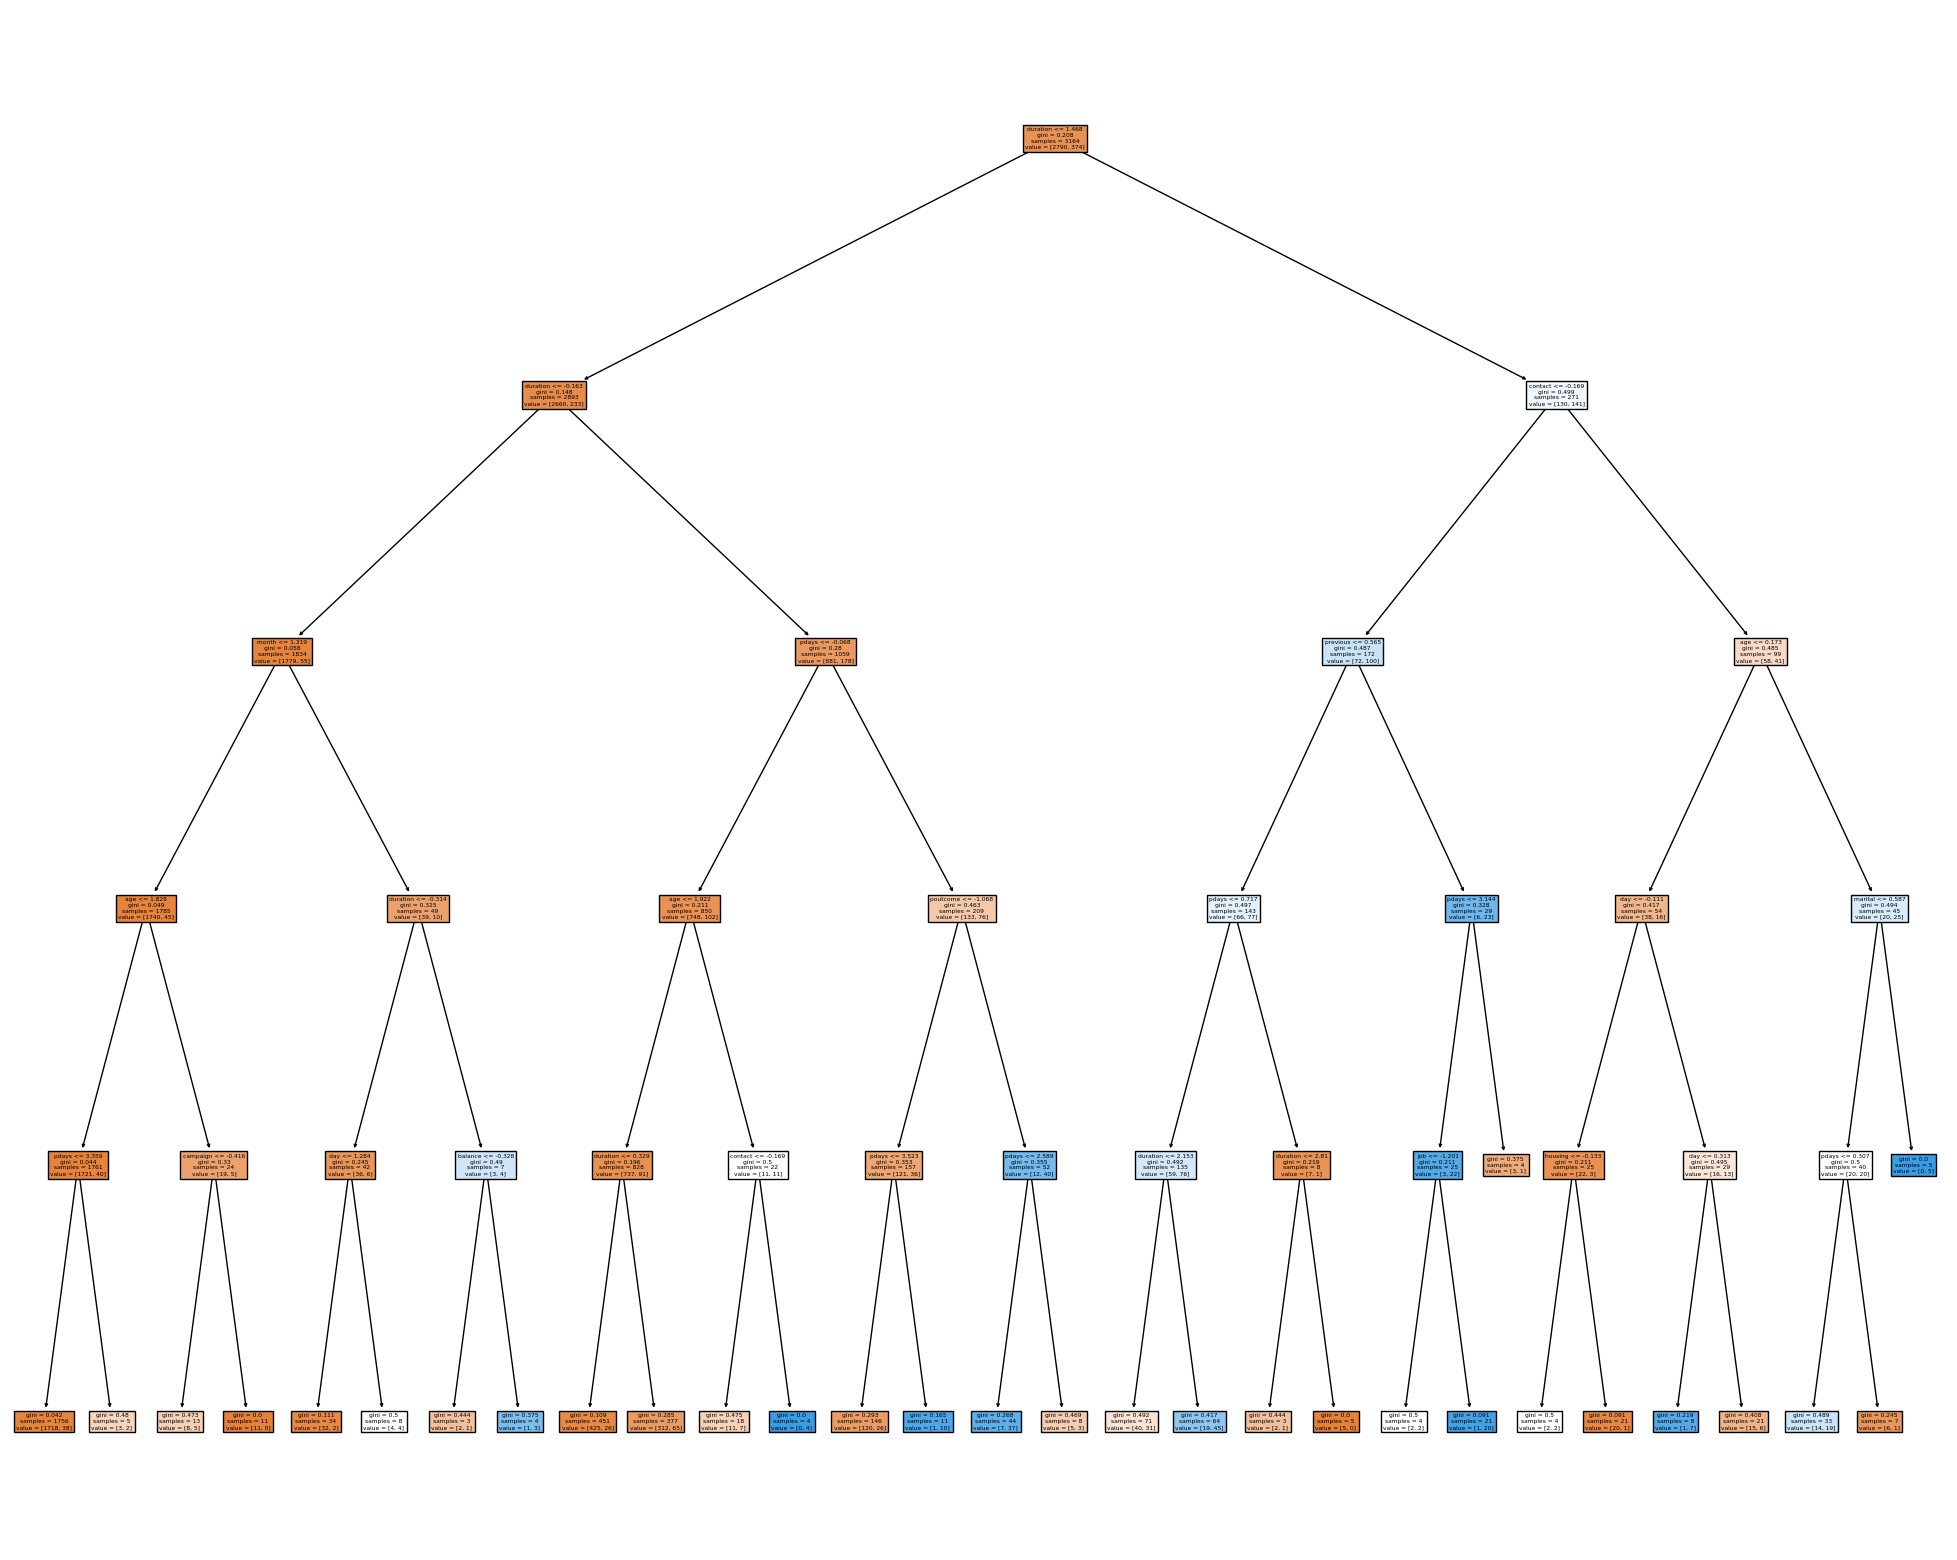

In [41]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(clf,filled=True,feature_names=X.columns)

### Conclusion and Key Insights

In this project, we embarked on a journey to build a predictive model for term deposit subscriptions in a banking context to help a Portuguese banking institution tailor its marketing efforts effectively. 
Let's recap the key takeaways and insights from this endeavor:

**Data Pre-processing:**

The initial data inspection revealed a well-structured dataset with no missing values. While we encountered some duplicate entries, they were not considered errors but rather different campaigns targeting the same clients.

**Exploratory Data Analysis (EDA):**

- The age distribution of clients highlighted that the majority fell in the 30-40 age range, coinciding with the highest subscription rate for term deposits.
- Occupation-wise, clients in administrative, blue-collar and technician roles formed the majority and were more likely to subscribe to term deposits.
- Marital status leaned heavily toward the "married" category.
- Clients with university degrees or high-level education were more prominent and had a higher subscription rate.
- Credit defaults were rare, with the vast majority of clients having no credit defaults.
- Clients with housing loans were more likely to subscribe to term deposits, while those with personal loans were less likely.

**Model Building and Evaluation:**

- We implemented a Decision Tree classifier to predict term deposit subscriptions.
- The model exhibited strong performance, achieving an accuracy rate of approximately 91.52% on both training and testing data.
- Cross-validation confirmed the robustness of our model, with an accuracy score of around 91.60%.
- The classification report revealed a balanced model with reasonable precision, recall, and F1-scores for both subscribed and non-subscribed clients.


#### Insights:

- The duration of calls was a significant predictor of term deposit subscriptions. Clients tended to subscribe after longer conversations, suggesting the importance of engaging clients effectively during calls.
- Previous attempts at contact also played a role, indicating that repeated contact can be fruitful in convincing clients to subscribe.
- Multicollinearity among some input features was observed, potentially affecting model performance. Consideration should be given to addressing this issue in future iterations.

**Future Directions:**

To further enhance predictive accuracy, exploring other machine learning algorithms or ensemble methods could be beneficial.
Feature engineering and selection methods could be employed to mitigate multicollinearity.
Incorporating external data sources, such as economic indicators or market trends, may provide additional insights and improve model performance.
A real-time deployment of the model into the bank's operational systems can automate decision-making and streamline marketing efforts.

Thank you !

Project by:
Archana Kokate

